# Maths - Form & Function: Chapter 7 (Linear Algebra)

***

## 1. Sources of Linearity

> To say that an effect is "linear" means that the effect respects proportions and that the effect of a sum is the sum of the separate effects.

In [12]:
import numpy as np

# Show that axioms are satisfied for vectors / scalars under
# addition and multiplication

F = range(0, 100) # a field of scalars
V = [np.array([x, x * 2]) for x in range(0, 100)] # a set of vectors
a, b = F[50], F[51]
v, w = V[25], V[66]

print(
    all(
        [
            np.array_equal(a * (v + w), a * v + a * w),
            np.array_equal(1 * v, v),
            np.array_equal((a + b) * v , a * v + b * v),
            np.array_equal((a * b) * v, a * (b * v))
        ]
    )
)      

True


In [13]:
def linear_combination(F, V):
    lc = sum([x * y for x in F for y in V])
    return lc

print(linear_combination(F, V))

[24502500 49005000]


In [14]:
T = sum # A transformation that preserves linear combinations

# 2 simple identities proving the transformations
print(np.array_equal(T(v + w), T(v) + T(w)))
print(np.array_equal(T(a * v), a * T(v)))

True
True


***

## 2. Transformations versus Matrices

There are 2 styles of doing linear algebra:

- Geometrically, or invariantly, with linear combinations of vectors
- Explicitly, with coordinates (which depends on a choice of basis)

In [15]:
def linear_endomorphism(u, a, j):
    """ Images from a linear endomorphism.
    u - vectors
    a - coefficients
    j - index of the basis
    """
    a = a[j]
    return sum([x * y for x in u for y in a])

def coordinates_vectors(a, i, j, x):
    """ Gives the coordinates of a transformation.
    a - coefficients
    i - index of the basis
    x - previous coordinates
    """
    a = a[i]
    return sum([l * m for l in a for m in x])

> In the 20th century, matrix multiplication had trimphant (and unexpected) applications in quantum mechanics. However, the ideas underlying matrix theory first developed from the study of elasticity or at least from the use of many-variable calculus to get linear approximations.

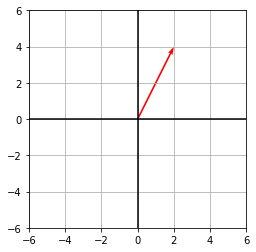

In [113]:
import matplotlib.pyplot as plt

C = np.array([2, 4])

def plot_create(plot):
    fig, ax = plot.subplots()
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_aspect('equal')
    plot.xlim(-6, 6)
    plot.ylim(-6, 6)
    return fig, ax, plot

fig, ax, plt = plot_create(plt)
plt.quiver(C[0], C[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.show()

[4 2]


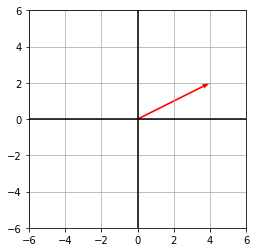

In [115]:
# Change the x & y axis
T = np.array([[0, 1], [1, 0]])
C2 = np.dot(T, C)

fig, ax, plt = plot_create(plt)
plt.quiver(C2[0], C2[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.show()

[2. 6.]


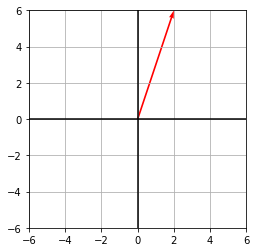

In [120]:
# Stretch y dimension
T = np.array([[1, 0], [0, 1.5]])
C2 = np.dot(T, C)

fig, ax, plt = plot_create(plt)
plt.quiver(C2[0], C2[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.show()

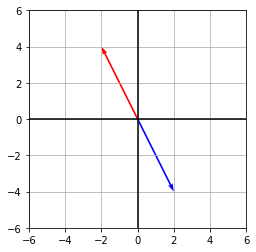

In [123]:
# Reflect on x & y
T2 = np.array([[-1, 0], [0, 1]])
C2 = np.dot(T2, C)
T3 = np.array([[1, 0], [0, -1]])
C3 = np.dot(T3, C)

fig, ax, plt = plot_create(plt)
plt.quiver(C2[0], C2[1], angles = "xy", scale_units = "xy", scale = 1, color = "r")
plt.quiver(C3[0], C3[1], angles = "xy", scale_units = "xy", scale = 1, color = "b")
plt.show()

***

## 3. Eigenvalues

> Two matrices $A$ and $B$ which represent the same endomorphism of $V$ relative to (possibly) different bases are said to be *similar* ... square matrices $A$ and $B$ are similar if and only if there is a non-singular matrix $P$ with $B = PAP^{-1}$

> $\lambda$ is an *eigenvalue* of an endomorphism $T$ if and only if $Tv = v\lambda$ for some non-zero vector$v$; equivalently, in matrix language, $\lambda$ is an eignenvalue of a matrix $A$ if and only if $AX = X\lambda$ for some $X \neq 0$.

> An *eigenvector* $X$ for $A$ is then any vector (zero or not) with $AX = X\lambda$ for a scalar $\lambda$

**Theorem 1.** An n X n square matrix A is similar to a diagonal matrix if and only if A has n linearly independent eigenvectors.

In [5]:
from numpy import linalg as la

A = np.array([[2, -1], [4, 3]])
eigenvalues, eigenvectors = la.eig(A)

a, b = eigenvalues
print("Eigenvalues:")
print(a)
print(b)
print()

x = eigenvectors[:, 0]
print("Eigenvectors:")
print(x)

Eigenvalues:
(2.5+1.9364916731037083j)
(2.5-1.9364916731037083j)

Eigenvectors:
[-0.1118034 +0.4330127j  0.89442719+0.j       ]


In [6]:
A_by_x = np.dot(A, x)
print(A_by_x)

[-1.11803399+0.8660254j   2.23606798+1.73205081j]


In [7]:
x_by_a = x * a
print(x_by_a)

[-1.11803399+0.8660254j   2.23606798+1.73205081j]


In [8]:
print(np.allclose(A_by_x, x_by_a))

True


In [9]:
determinant = A[0, 0] * A[1, 1]  - A[0, 1] * A[1, 0]
print(determinant)
print(math.isclose(determinant, la.det(A)))

10


NameError: name 'math' is not defined

In [ ]:
trace = A[0, 0] + A[1, 1]
print(math.isclose(trace, np.trace(A)))

**Theorem 2.** The eigenvalues of A are the roots of its characteristic polynomial

In [ ]:
import sympy

A_sym = sympy.Matrix(A)
A_sym.charpoly().as_expr()

***

## 4. Dual Spaces